# Assignment 03
Introduction to Numerical Problem Solving, Spring 2017   
28.2.2017, Ali Bahrami

Helsinki Metropolia University of Applied Sciences


## Exercise 2, Problem 8

### Solution
For calculating the single precision single() is used. 

In [17]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import *
from numpy import *
from scipy.misc import factorial

def trueValue( maxiteration, direction ):
    powerlevel=1
    if direction == 1:
        n=single(maxiteration-1)
        k=single(1.0)
        y=single(0.0)
    else:
        n=single(0.0)
        k=single(maxiteration)
        y=single(0.0)
    print("From ",k, "to", n)
    while k!= n:
        y=single(y+1/(k**4))
        k=single(k+direction)
        if k%powerlevel == 0:
            powerlevel=powerlevel*10
            print("At k=",k,"f(n) is ",y)
    return y
def normalized_error(true_error,true_value):
    return (true_error/true_value)*100

        
approx=(pi**4)/90
posApproach=trueValue(10000,1)
negApproach=trueValue(10000,-1)
print("For k=1 to 10000, by single precision the true value of f(n)=",posApproach,"Approximation is Approx=",approx)
print("For k=10000 to 1, by single precision the true value of f(n)=",negApproach,"Approximation is Approx=",approx)
true_value=posApproach
true_error=true_value-approx
print("For k=1 to 10000, true percent relative error is ",normalized_error(true_error,true_value),"%")
true_value=negApproach
true_error=true_value-approx
print("For k=10000 to 1, true percent relative error is ",normalized_error(true_error,true_value),"%")



From  1.0 to 9999.0
At k= 2.0 f(n) is  1.0
At k= 10.0 f(n) is  1.08194
At k= 100.0 f(n) is  1.08232
At k= 1000.0 f(n) is  1.08232
From  10000.0 to 0.0
At k= 9999.0 f(n) is  1e-16
At k= 9990.0 f(n) is  1.0018e-15
At k= 9900.0 f(n) is  1.02013e-14
At k= 9000.0 f(n) is  1.23888e-13
At k= 0.0 f(n) is  1.08232
For k=1 to 10000, by single precision the true value of f(n)= 1.08232 Approximation is Approx= 1.082323233711138
For k=10000 to 1, by single precision the true value of f(n)= 1.08232 Approximation is Approx= 1.082323233711138
For k=1 to 10000, true percent relative error is  -0.000102839 %
For k=10000 to 1, true percent relative error is  -3.71063e-06 %


## Notes
As the calculation shows,our approach for gaining 
the approximation of f(x) will not affect its value.


____

## Exercise 03 problem 1c

### Solution

There are six functions for solving this problem:
1. f where the equation exist
2. fperim which caclulates the derivative of f
3. roots which calculates the roots of f by Newton method
4. maximum which calculates the local maximum of f
5. minimum which calculates the local minimum of f

. For finding roots the following source was used as reference of Newton method.
[https://en.wikipedia.org/wiki/Newton's_method]

. Precision is provided by introducing scientific notation of values for accurate significant numbers.


maximum x= 2.0 y=2.0
minimum x= 0.74 y=1.7
roots are  -1.0 -1.0


<IPython.core.display.Javascript object>


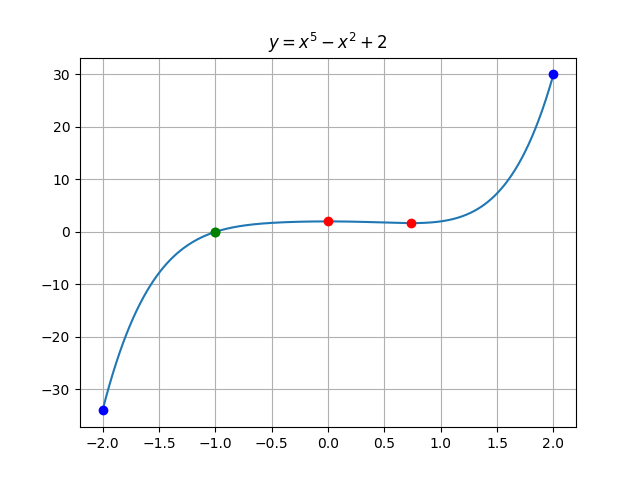

In [54]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import *
from numpy import *
def f(x):
    return x**5-x**2+2
def fperim(x):
    return 5*x**4-2*x

def roots(x):
    "based on Newton's method."
    x_n=x
    found=False
    while(not found):
        deriv_value=fperim(x_n)
        if(deriv_value==0):
            x_n+=0.1
            continue
        x_n=x_n-(f(x_n)/deriv_value)
        if(f(x_n)==0):
            found=True
        
    return x_n
def maximums(low,high):
    x=low
    y=f(x)
    maxm = []
    
    x+=1.0*10**-2
    z=f(x)
    tempx=x
    
    while(x<high):
        x+=1.0*10**-2
        w=f(x)
        if(z>y)and(z>w):
            maxm.append(tempx)
        
        y=z
        z=w
        tempx=x
        
    return maxm
            
            
            
        
    
def minimums(low,high):
    x=high
    y=f(x)
    minm = []
    x-=1.0*10**-2
    z=f(x)
    tempx=x

    while(x>low):
        x-=1.0*10**-2
        w=f(x)
        if(z<y)and(z<w):
            minm.append(tempx)
            
        
        y=z
        z=w
        tempx=x
        
    return minm
     



low=-0.02*10**2
high=0.02*10**2
step=1.0*10**-2
x=arange(low,high,step)
y=f(x)
x0=low
y0=f(x0)
x1=high
y1=f(x1)
maxs=maximums(low,high)
mins=minimums(low,high)
print("maximum x= {1:.1f} y={1:.1f}".format(maxs[0],f(maxs[0])))
print("minimum x= {0:.2f} y={1:.1f}".format(mins[0],f(mins[0])))

root1=roots(low)
root2=roots(high)
print("roots are ",root1,root2)
figure()
plot(x,y)
plot(mins[0],f(mins[0]),'ro')
plot(maxs[0],f(maxs[0]),'ro')
plot(x0,y0,'bo')
plot(x1,y1,'bo')
plot(root1,f(root1),'go')
plot(root2,f(root2),'go')
title("$y=x^5-x^2+2$")
grid()


## Exercise 03 problem 2a
### Solution
For finding the intersection numpy's argwhere is used.
Plot is then marked with the intersection points found as a return value of that function.

<IPython.core.display.Javascript object>


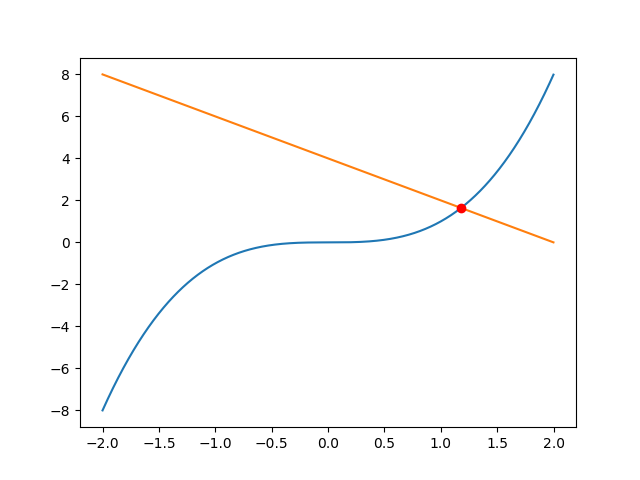

value of x for intersection: 1.18
value of y for intersection: 1.64


In [57]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import *
from numpy import *

n=3
es=0.5*10**-n
step=1.0 * 10**-n
x=arange(-2,2,step)
y1=x**3
figure()
plt.plot(x,y1)
y2=4-2*x
plt.plot(x,y2)
idx = np.argwhere(np.diff(sign(y1 - y2)) != 0).reshape(-1) + 0
plt.plot(x[idx], y1[idx], 'ro')
print('value of x for intersection: {0:.2f}'.format(x[idx][0]))
print("value of y for intersection: {0:.2f}".format(y1[idx][0]))


## Exercise 03 problem 4a
### Solution
Aseymptote is calculated by finding the limit of the function when x's value moves to infinity.
For this reason the function is multiplied by (1/x)/(1/x)
The value of y then moves to 2 when x moves to infinity
For drawing the line some sort of hack was used so the correct value is aseymptote=2 
At x=3, the value of y is not measurable. So if x<3 and it moves gradually to 3 y moves to a great positive number.
If x>3 and it moves gradually to 3 y moves to a great negative number.

<IPython.core.display.Javascript object>


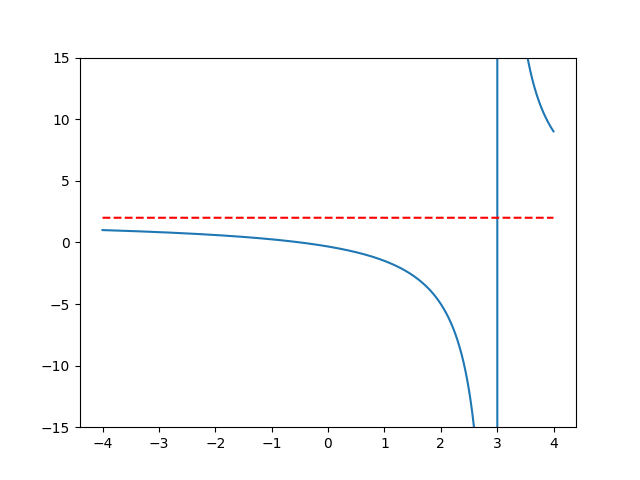

3.998 9.01402805612


In [58]:

x=arange(-4,4,0.002)
y=(2*x+1)/(x-3)
aseymptote= 0*x +2
figure()
plt.plot(x,y)
plt.plot(x,aseymptote,"r--")
ylim([-15,15])
print(x[-1],y[-1])